<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/LLMs_from_Scratch/Working_with_text_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# create a requirement.txt file
with open("requirements.txt", "w") as f:
    f.writelines

In [2]:
with open("requirements.txt", "r") as f:
    print(f.read())

In [3]:
!pip install -r requirements.txt

## Tokenization of the raw text

In [4]:
from importlib.metadata import version

print("torch version:", version("torch"))
print("tiktoken version:", version("tiktoken"))
print("numpy version:", version("numpy"))

torch version: 2.8.0+cu126
tiktoken version: 0.12.0
numpy version: 2.0.2


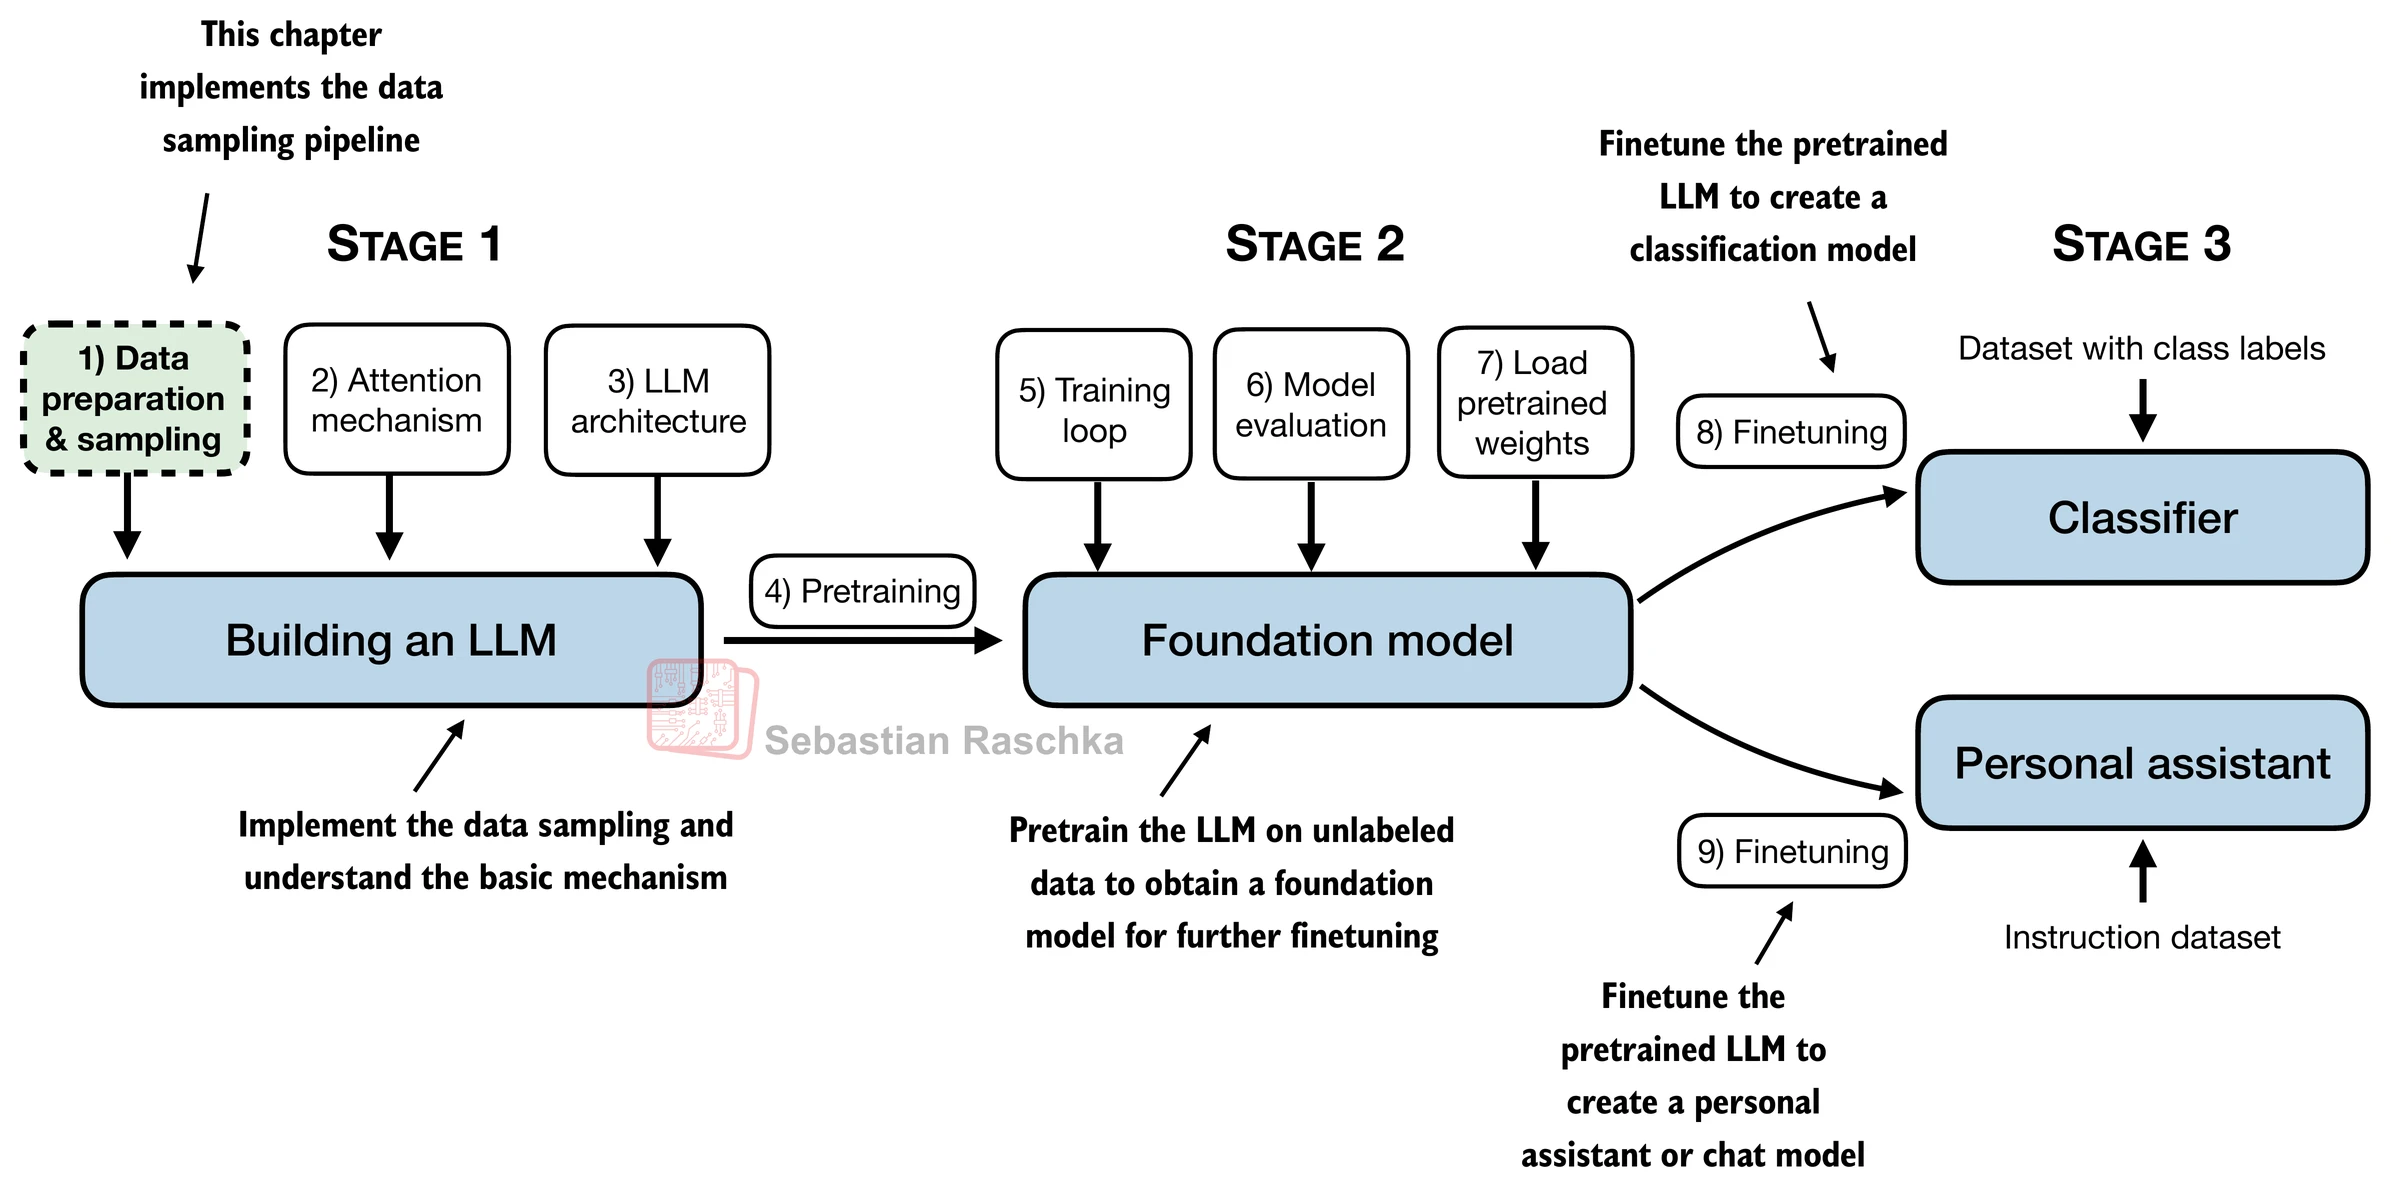

In [5]:
# text data are converted into vectors
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

In [6]:
# adding the new data
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print("total length of the text", len(raw_text))
print(raw_text[:100])

total length of the text 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [7]:
import re

# split the tokens
text = "Hello, this is the test sample"
result = re.split(r"(\s)", text)

print(result)

['Hello,', ' ', 'this', ' ', 'is', ' ', 'the', ' ', 'test', ' ', 'sample']


In [8]:
# split by the space and (,.) chars
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'this', ' ', 'is', ' ', 'the', ' ', 'test', ' ', 'sample']


In [9]:
# remove the whitespace
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'this', 'is', 'the', 'test', 'sample']


In [10]:
# handle the other types of the punctuation
result = [item for item in result if not item in [",", ".", " "]]
print(result)

['Hello', 'this', 'is', 'the', 'test', 'sample']


In [11]:
# text for the tokenization techniques
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.]|\s|--|\?)', text)
result = [item for item in result if item.strip()]
result = [item for item in result if not item in [",", ".", "?", " "]]
print(result)

['Hello', 'world', 'Is', 'this', '--', 'a', 'test']


In [12]:
# tokenization of the raw text
preprocessed_text = re.split(r'([,.]|\s|--|\?)', raw_text)
preprocessed_text = [item for item in preprocessed_text if item.strip() or item == ' '] # Keep spaces
preprocessed_text = [item for item in preprocessed_text if not item in [",", ".", "?", ""]]
print(preprocessed_text)

['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '--', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '--', 'so', ' ', 'it', ' ', 'was', ' ', 'no', ' ', 'great', ' ', 'surprise', ' ', 'to', ' ', 'me', ' ', 'to', ' ', 'hear', ' ', 'that', ' ', 'in', ' ', 'the', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', ' ', 'he', ' ', 'had', ' ', 'dropped', ' ', 'his', ' ', 'painting', ' ', 'married', ' ', 'a', ' ', 'rich', ' ', 'widow', ' ', 'and', ' ', 'established', ' ', 'himself', ' ', 'in', ' ', 'a', ' ', 'villa', ' ', 'on', ' ', 'the', ' ', 'Riviera', ' ', '(Though', ' ', 'I', ' ', 'rather', ' ', 'thought', ' ', 'it', ' ', 'would', ' ', 'have', ' ', 'been', ' ', 'Rome', ' ', 'or', ' ', 'Florence', ')', '"The', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory"', '--', 'that', ' ', 'was', ' ', 'what', ' ', 'the', ' ', 'women', ' ', 'called', ' ', 'it', ' ', 'I', ' ', 'can', ' ', 'hear', ' ',

## Converting tokens into token IDs

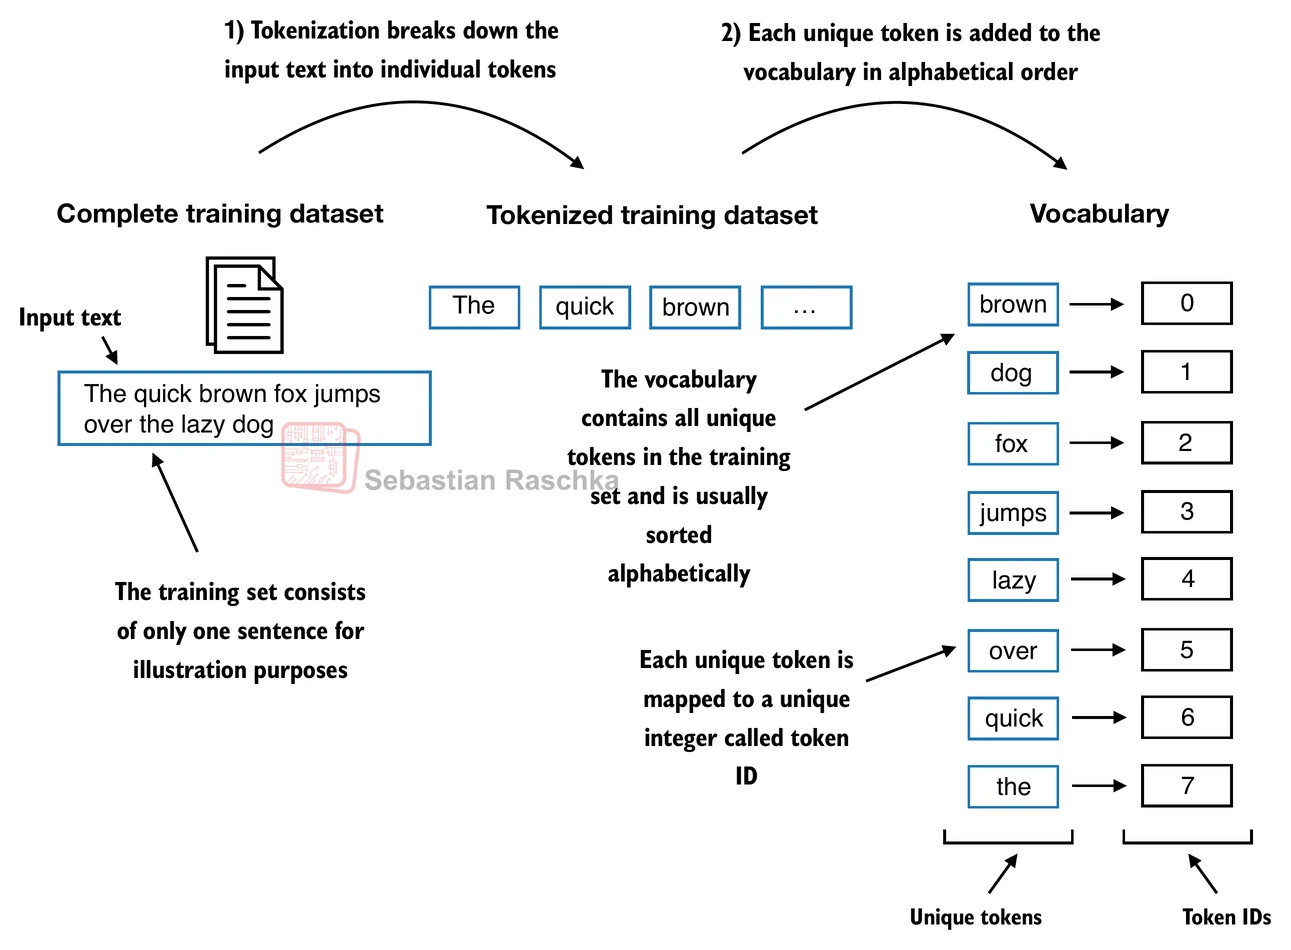

Source: LLMs from scratch by Sabatian R.

In [13]:
# length of the input
print(len(preprocessed_text))

7407


In [14]:
# check the unique words in the corpus
print(len(set(preprocessed_text)))

1238


In [15]:
# create the vocab of the tokens
vocab = {token:inte for inte, token in enumerate(sorted(set(preprocessed_text)))}
print(vocab)

{' ': 0, '"': 1, '"Ah': 2, '"Be': 3, '"Begin': 4, '"By': 5, '"Come': 6, '"Destroyed': 7, '"Don\'t': 8, '"Gisburns"': 9, '"Grindles': 10, '"Hang': 11, '"Has': 12, '"How': 13, '"I': 14, '"I\'d': 15, '"If': 16, '"It': 17, '"It\'s': 18, '"Jack': 19, '"Money\'s': 20, '"Moon-dancers"': 21, '"Mr': 22, '"Mrs': 23, '"My': 24, '"Never': 25, '"Of': 26, '"Oh': 27, '"Once': 28, '"Only': 29, '"Or': 30, '"That': 31, '"The': 32, '"Then': 33, '"There': 34, '"There:': 35, '"This': 36, '"We': 37, '"Well': 38, '"What': 39, '"When': 40, '"Why': 41, '"Yes': 42, '"You': 43, '"but': 44, '"deadening': 45, '"dragged': 46, '"effects";': 47, '"interesting":': 48, '"lift': 49, '"obituary"': 50, '"strongest': 51, '"strongly"': 52, '"sweetly"': 53, "'": 54, "'Are": 55, "'It's": 56, "'coming'": 57, "'done'": 58, "'subject": 59, "'technique'": 60, "'way": 61, '(I': 62, '(Though': 63, ')': 64, '--': 65, 'A': 66, 'Among': 67, 'And': 68, 'Arrt': 69, 'As': 70, 'At': 71, 'Burlington': 72, 'But': 73, 'By': 74, 'Carlo': 75, 

In [16]:
# write a sample tokenizer for the input text to map the output
class SimpleTokenizer:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {inte:token for token, inte in vocab.items()}

    def encode(self, text):
      preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

      return [self.str_to_int[token] for token in preprocessed]

    def decode(self, ids):
      text =  " ".join([self.int_to_str[id] for id in ids])
      return text


- encode: encodes the input to the tokens ids
- decode: decodes the ids into the text tokens

In [17]:
# test the simmpletokenizer:
tokenizer = SimpleTokenizer(vocab)

text = "It the last he painted you know Mrs Gisburn said with pardonable pride"
encoded_text = tokenizer.encode(text)
print(encoded_text)

[110, 0, 1081, 0, 684, 0, 604, 0, 835, 0, 1232, 0, 677, 0, 122, 0, 89, 0, 943, 0, 1210, 0, 845, 0, 885]


In [18]:
tokenizer.decode(encoded_text)

'It   the   last   he   painted   you   know   Mrs   Gisburn   said   with   pardonable   pride'

In [19]:
# extend the token with endoftext and uk tokens
all_tokens = sorted(set(preprocessed_text))
all_tokens.extend(['<|endoftext|>', '<|uk|>'])

vocab = {token:inte for inte, token in enumerate(all_tokens)}
print(vocab)

{' ': 0, '"': 1, '"Ah': 2, '"Be': 3, '"Begin': 4, '"By': 5, '"Come': 6, '"Destroyed': 7, '"Don\'t': 8, '"Gisburns"': 9, '"Grindles': 10, '"Hang': 11, '"Has': 12, '"How': 13, '"I': 14, '"I\'d': 15, '"If': 16, '"It': 17, '"It\'s': 18, '"Jack': 19, '"Money\'s': 20, '"Moon-dancers"': 21, '"Mr': 22, '"Mrs': 23, '"My': 24, '"Never': 25, '"Of': 26, '"Oh': 27, '"Once': 28, '"Only': 29, '"Or': 30, '"That': 31, '"The': 32, '"Then': 33, '"There': 34, '"There:': 35, '"This': 36, '"We': 37, '"Well': 38, '"What': 39, '"When': 40, '"Why': 41, '"Yes': 42, '"You': 43, '"but': 44, '"deadening': 45, '"dragged': 46, '"effects";': 47, '"interesting":': 48, '"lift': 49, '"obituary"': 50, '"strongest': 51, '"strongly"': 52, '"sweetly"': 53, "'": 54, "'Are": 55, "'It's": 56, "'coming'": 57, "'done'": 58, "'subject": 59, "'technique'": 60, "'way": 61, '(I': 62, '(Though': 63, ')': 64, '--': 65, 'A': 66, 'Among': 67, 'And': 68, 'Arrt': 69, 'As': 70, 'At': 71, 'Burlington': 72, 'But': 73, 'By': 74, 'Carlo': 75, 

In [20]:
# create a new tokenize with updated vocab which is version 2 of the tokenizer
class SimpleTokenizerV2:
    def __init__(self, vocab):
      self.str_to_int = vocab
      self.int_to_str = {inte:token for token, inte in vocab.items()}

    def encode(self, text):
      preprocessed_text = re.split(r'([,.:;?_!"()\']|--|\s)', text)
      preprocessed_text = [item.strip() for item in preprocessed_text if item.strip()]
      preprocessed_text = [item if item in self.str_to_int else '<|uk|>' for item in preprocessed_text]
      preprocessed_text.append('<|endoftext|>')
      ids = [self.str_to_int[token] for token in preprocessed_text]
      return ids

    def decode(self, ids):
      text = "".join(self.int_to_str[id] for id in ids)
      return text


In [21]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sublit terraces of the palace"

text = "<|endoftext|>".join((text1,text2))
print(text)

Hello, do you like tea?<|endoftext|>In the sublit terraces of the palace


In [22]:
tokenizer.encode(text)

[1239,
 1239,
 427,
 1232,
 712,
 1069,
 1239,
 1239,
 1081,
 1239,
 1077,
 809,
 1081,
 1239,
 1238]

In [23]:
tokenizer.decode(tokenizer.encode(text))

'<|uk|><|uk|>doyouliketea<|uk|><|uk|>the<|uk|>terracesofthe<|uk|><|endoftext|>'

### BytePair encoding

In [25]:
import importlib.metadata
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.12.0


In [26]:
# get the gpt2 tokenizer from the tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

text = (
    "Hello, do you like tea?"
    "In the sublit terraces of the palace"
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 818, 262, 850, 18250, 8812, 2114, 286, 262, 20562]


In [27]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea?In the sublit terraces of the palace


In [28]:
## data sampling with sliding window for the generative AI training
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))


5145


In [29]:
enc_sample = enc_text[50:]

In [30]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:       {y}")

x: [290, 4920, 2241, 287]
y:       [4920, 2241, 287, 257]


In [31]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [33]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]

  print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [35]:
import torch
print("PyTorch version", torch.__version__)

PyTorch version 2.8.0+cu126


In [42]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
        # Drop the last chunk if it's shorter than max_length + 1
        assert len(token_ids) >= max_length + 1, "Number of tokenized inputs must at least be equal to max_length + 1"

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk, dtype=torch.long))
            self.target_ids.append(torch.tensor(target_chunk, dtype=torch.long)) # Added dtype=torch.long

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self,idx):
        return self.input_ids[idx], self.target_ids[idx]

In [43]:
# create the dataloader for the given text
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True,num_workers=0):
  tokenizer = tiktoken.get_encoding("gpt2")
  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)
  return dataloader


In [39]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [44]:
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [45]:
second_batch = next(data_iter)

In [46]:
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [47]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


### Creating token embeddings

In [56]:
input_ids = torch.tensor([2,5,4,1])

In [51]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [52]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [59]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [57]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-2.8400, -0.7849, -1.4096],
        [-1.1589,  0.3255, -0.6315],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [60]:
# embeddings with diff vocab and output dim
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [62]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [63]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [64]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

# uncomment & execute the following line to see how the embeddings look like
# print(token_embeddings)

torch.Size([8, 4, 256])


In [65]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [66]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [69]:
pos_embeddings

tensor([[-0.6303, -0.4848, -0.1366,  ...,  1.0345, -0.5012,  1.1045],
        [ 0.2062,  0.6078,  0.7187,  ..., -0.4628, -0.2319,  1.1980],
        [ 0.5806, -1.3846,  0.3266,  ...,  0.8579,  0.5059,  1.0243],
        [ 1.4323,  0.2217,  0.8599,  ...,  0.4827,  0.8459,  1.3038]],
       grad_fn=<EmbeddingBackward0>)

In [67]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)


torch.Size([8, 4, 256])


In [68]:
input_embeddings

tensor([[[-0.1390,  0.6390,  1.3222,  ...,  0.6350, -2.3747,  0.9599],
         [ 0.6543,  0.8614,  0.4532,  ...,  0.0369, -1.4310,  0.0136],
         [ 0.3299, -1.4393,  0.9953,  ...,  1.8197,  2.8795,  0.9715],
         [ 2.3781,  1.0874,  2.4790,  ...,  0.0283,  0.0999,  1.6521]],

        [[ 0.9158,  1.2520, -0.9214,  ...,  0.9341,  0.3572,  0.7624],
         [-1.6560,  0.4164,  0.3375,  ...,  0.6591, -0.5815,  1.8070],
         [ 2.5653, -2.0329,  0.1851,  ...,  0.4738, -0.4297,  2.4721],
         [ 2.3971,  1.5190, -0.7608,  ...,  1.6290,  2.4256,  1.7007]],

        [[-1.4016,  0.1724,  0.0297,  ...,  0.2302, -0.4470,  1.8471],
         [ 1.0107,  1.1125,  2.0109,  ...,  1.0020,  0.1778,  1.5185],
         [ 0.6601, -3.1482,  0.9016,  ...,  3.0402,  2.3289,  0.6608],
         [ 1.8590,  0.1569,  1.4285,  ..., -0.0382,  2.1524,  2.1511]],

        ...,

        [[-2.2458,  0.4762, -2.7803,  ...,  0.0701,  0.5877,  2.7428],
         [-0.1923, -0.3157, -0.5976,  ..., -1.6210, -1.36